In [16]:
import roboticstoolbox as rbt
from spatialmath import *
import numpy as np

In [6]:
pi = np.pi
l1 = 3
l2 = 5

In [ ]:
# 3R-R-3R
human_arm = rbt.DHRobot([
        rbt.RevoluteMDH(), #joint 1
        rbt.RevoluteMDH(alpha = pi/2, offset = pi/2), #joint 2
        rbt.RevoluteMDH(alpha = -pi/2), #joint 3
        rbt.RevoluteMDH(a = l1, alpha = pi/2, offset = -pi/2), #joint 4
        rbt.RevoluteMDH(alpha = -pi/2, d = l2), #joint 5
        rbt.RevoluteMDH(alpha = pi/2, offset = pi/2), #joint 6
        rbt.RevoluteMDH(alpha = -pi/2), #joint 7
    ],
    name = "Human Arm"
)
human_arm

DHRobot: Human Arm, 7 joints (RRRRRRR), dynamics, modified DH parameters
┌──────┬────────┬───────────┬─────┐
│ aⱼ₋₁ │  ⍺ⱼ₋₁  │    θⱼ     │ dⱼ  │
├──────┼────────┼───────────┼─────┤
│  0.0 │   0.0° │        q1 │ 0.0 │
│  0.0 │  90.0° │  q2 + 90° │ 0.0 │
│  0.0 │ -90.0° │        q3 │ 0.0 │
│    3 │  90.0° │  q4 - 90° │ 0.0 │
│  0.0 │ -90.0° │        q5 │   5 │
│  0.0 │  90.0° │  q6 + 90° │ 0.0 │
│  0.0 │ -90.0° │        q7 │ 0.0 │
└──────┴────────┴───────────┴─────┘

┌──┬──┐
└──┴──┘

# MoveJ mode

## Forward Kinematics

In [ ]:
q = [0,0,0,0,0,0,0]

In [12]:
T_0e = human_arm.fkine(q)
T_0e

   0         0        -1         0         
   0         1         0         0         
   1         0         0         8         
   0         0         0         1         


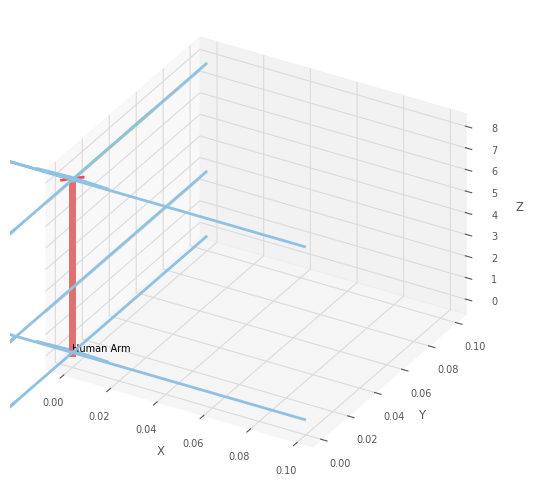

PyPlot3D backend, t = 0.05, scene:
  robot: Text(0.0, 0.0, 'Human Arm')

<Figure size 640x480 with 0 Axes>

In [13]:
human_arm.plot(q)

## Invert Kinematics

In [22]:
T_goal = SE3(5,1,3) @ SE3.Rx(pi/2)
T_goal

   1         0         0         5         
   0         0        -1         1         
   0         1         0         3         
   0         0         0         1         


In [23]:
q_sol = human_arm.ikine_LM(T_goal)

In [ ]:
q_sol

IKSolution(q=array([-2.36494358,  2.23802216,  1.07888474, -1.53745682,  2.00664084,
        2.70683588,  2.1162523 ]), success=True, iterations=10, searches=1, residual=6.243801936115262e-11, reason='Success')

In [25]:
q_sol.q

array([-2.36494358,  2.23802216,  1.07888474, -1.53745682,  2.00664084,
        2.70683588,  2.1162523 ])

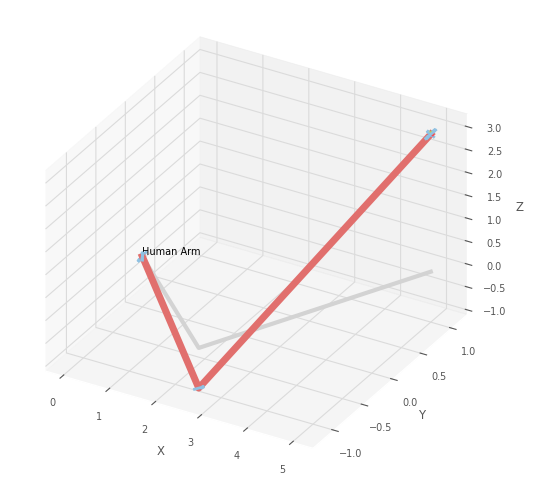

PyPlot3D backend, t = 0.05, scene:
  robot: Text(0.0, 0.0, 'Human Arm')

<Figure size 640x480 with 0 Axes>

In [26]:
human_arm.plot(q_sol.q)

# MoveL mode